## IMPORT ED EXPORT ITALIANO

Un altro dei punti rivendicati è la salvaguardia di precisi limiti all'importazione da altri stati. La questione non è unicamente di natura economica: gli agricoltori lamentano soprattutto l'assenza di standard igienici pari a quelli italiani. L'effetto sarebbe dunque quello di una produzione agroalimentare a basso costo con un dannoso impatto sulla salute, nonché intrisa di complicazioni per lavoratori sottopagati.

Vediamo com'è la situazione italiana sotto questo punto di vista.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import json

In [21]:
export_data = {
    "Category": ["Totale", "Agroalimentare", "Agricoltura", "Industria alimentare"],
    "2021": [520.771, 52.900, 8.093, 44.808],
    "2022": [626.195, 60.706, 8.374, 52.332],
    "gen-set 2023": [466.498, 47.361, 6.383, 40.977],
}

In [22]:
import_data = {
    "Category": ["Totale", "Agroalimentare", "Agricoltura", "Industria alimentare"],
    "2021": [480.437, 49.010, 16.619, 32.391],
    "2022": [660.249, 61.721, 21.251, 40.470],
    "gen-set 2023": [446.315, 48.598, 16.287, 32.311],
}


In [23]:
export_df = pd.DataFrame(export_data)
import_df = pd.DataFrame(import_data)

In [24]:
export_melted = export_df.melt(id_vars=["Category"], var_name="Year", value_name="Export (mln €)")
import_melted = import_df.melt(id_vars=["Category"], var_name="Year", value_name="Import (mln €)")

merged_df = pd.merge(export_melted, import_melted, on=["Category", "Year"])

In [25]:
chart = alt.Chart(merged_df).transform_fold(
    ['Export (mln €)', 'Import (mln €)'],
    as_=['Type', 'Value']
).mark_line().encode(
    x='Year:N',
    y='Value:Q',
    color='Type:N',
    strokeDash='Type:N',
    facet=alt.Facet('Category:N', columns=2)
).properties(
    width=300,
    height=200
).interactive()

chart

alt.Chart(...)

La situazione tra import ed export italiana sembra dunque essere bilanciata, con una sottile differenza a favore dell'importazione di prodotti.
Ma da dove? E come mai?
E soprattutto, come viene controllata?


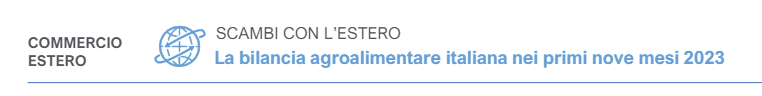

In [26]:
importatori = pd.read_csv("importatori.csv")
importatori

,Paese,2022,gen-ago 2022,gen-ago 2023,Var. % 2022/2021,Var. % gen-ago 23/gen-ago 22,Quota % gen-ago 2023
0,Francia,6858,4387,5104,317,163,118
1,Spagna,6832,4599,4747,241,32,110
2,Germania,6783,4245,5054,197,190,117
3,Paesi Bassi,5012,3191,3855,297,208,89
4,Brasile,2250,1446,1393,513,-37,32
5,Polonia,2188,1370,1654,291,207,38
6,Austria,1814,1165,1259,317,80,29
7,Belgio,1814,1148,1344,287,170,31
8,Grecia,1657,969,1545,260,594,36
9,Ungheria,1612,1103,1128,250,22,26


In [27]:
columns_to_drop = ['gen-ago 2022', 'Var. % 2022/2021', 'Var. % gen-ago 23/gen-ago 22', 'Quota % gen-ago 2023']
importatori = importatori.drop(columns_to_drop, axis=1)

print(importatori)

          Paese  2022  gen-ago 2023
0       Francia  6858          5104
1        Spagna  6832          4747
2      Germania  6783          5054
3   Paesi Bassi  5012          3855
4       Brasile  2250          1393
5       Polonia  2188          1654
6       Austria  1814          1259
7        Belgio  1814          1344
8        Grecia  1657          1545
9      Ungheria  1612          1128
10      Croazia  1293           477
11  Stati Uniti  1274           914
12    Danimarca  1139           815
13    Indonesia  1099           710
14         Cina  1080           631
15      Ucraina  1044           864
16    Argentina  1014           558
17     Slovenia   967           713
18      Romania   960           576
19       Canada   797           563


In [31]:
selection = alt.selection_single(fields=['Paese'], bind='legend')

chart = alt.Chart(importatori).mark_bar().encode(
    x=alt.X('Paese:N', sort='-y'),
    y=alt.Y('gen-ago 2023:Q', title='Gen-Ago 2023'),
    color=alt.condition(selection, 'Paese:N', alt.value('lightgray')),
    tooltip=['Paese:N', 'gen-ago 2023:Q']
).add_selection(
    selection
).properties(
    width=800,
    height=300
).interactive()  # Enable zooming and panning

chart.display()

c:\Users\beatr\anaconda3\envs\env_master\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\beatr\anaconda3\envs\env_master\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

La Francia è il principale importatore. Da lì, l'Italia acquista soprattutto bovini vivi, spumanti, carne bovina, zucchero, frumento tenero.
Al secondo posto abbiamo la Germania, con formaggi (stagionati e freschi), carne suina, prosciutti freschi o refrigerati.
La Spagna, al terzo posto, registra un grosso calo come esportatrice di olio d'oliva verso l'Italia, mentre aumenta l'import di carne suina, soprattutto prosciutti freschi o refrigerati.
Passando poi ai Paesi Bassi, l'import principale è di prosciutti freschi o refrigerati, piante vive, patate congelate, zucchero.

Al quinto posto, Polonia e Brasile hanno subito un'inversione di tendenza durante il 2023. Il paese europeo ha infatti aumentato l'esportazione delle carni bovine in Italia, così come l'olio di giraso. Il Brasile, invece, ha diminuito l'export di prodotti come semi di soia, mais e olio di arachidi, così come per le carni bovine. Resta però fondamentale per zucchero e caffè. 

#### Esportazioni e Concorrenza

Dunque, il 71% (dati Ismea Mercati) dell'importazione in Italia avviene all'interno della stessa Unione Europea, mentre a fine del 2023 la Coldiretti registra un record storico di export a 64 miliardi. Un dato che mosterrebbe l'Italia come economia competitiva all'interno di uno scambio di merci che favoriesce l'Europa. 


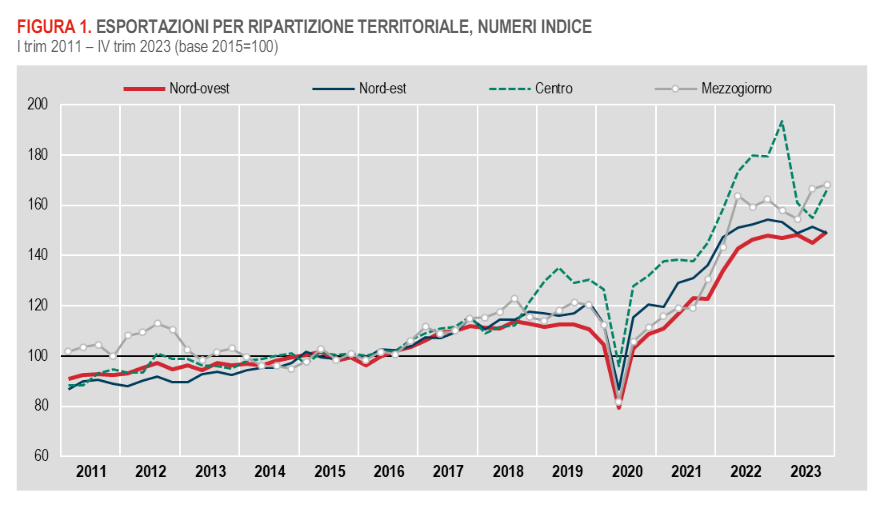

I dati disaggregati delle regioni mostrano quali sono le esportazioni registrate. Eppure, il dato interessante da comparare a questo grafo è senz'altro quello sulla tipologia di impresa esportatrice. 

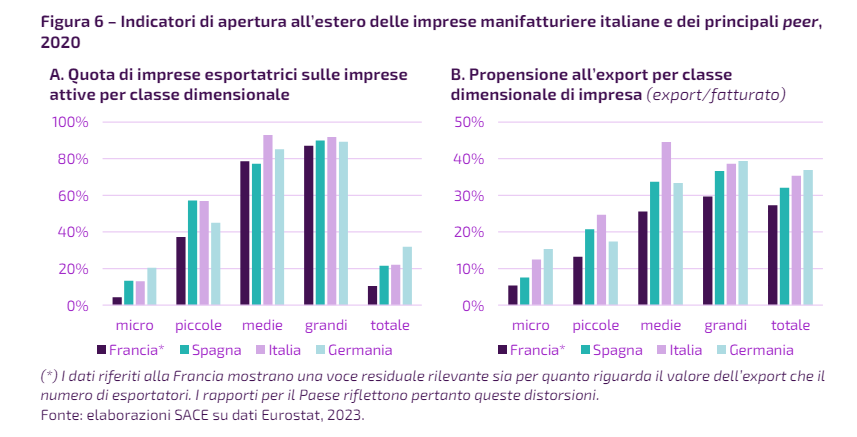
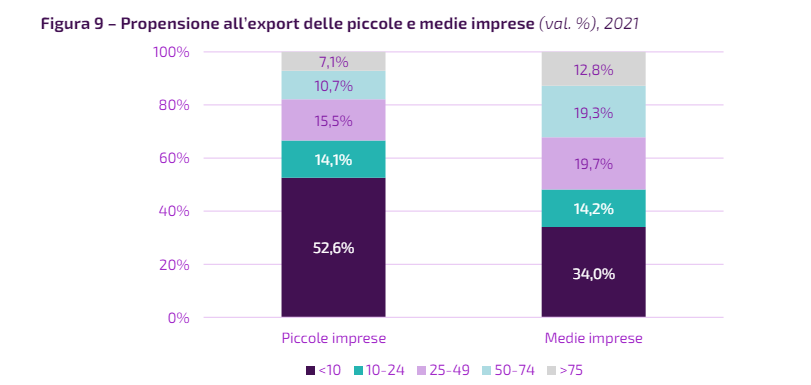

Questi dati, ottenuti tramite elaboracioni SACE dei dati ISTAT, mostrano nua importante differenza in termini di esportazione, all'interno della quale la metà delle piccole imprese è quasi tagliata fuori.

La concorrenza Italiana vantata dalla Coldiretti, infatti, è uno scenario molto disomogeneo: la maggioranza delle realtà agricole italiane faticano ancora a trovare una nicchia di mercato all'interno della logica di mercato dell'Europa. 

Non a caso, uno dei mirini delle proteste fu proprio la Coldiretti, che minimizzò il problema della crisi agricola a lungo.

[PEZZO INTERVISTA DANILO]

#### Importazioni e leggi

Veniamo ora all'analisi dell'importazione in Italia. Seguendo le indicazioni di Danilo, cerchiamo di comprendere quali sonole norme richieste in ambito di importazione. 

Sfortunatamente, il portale trade dell'Unione Europea non risulta essere trasparente in merito ai requisiti dei prodotti - qui, analisi di carni suine fresche o refrigerate dalla Polonia all'Italia. 
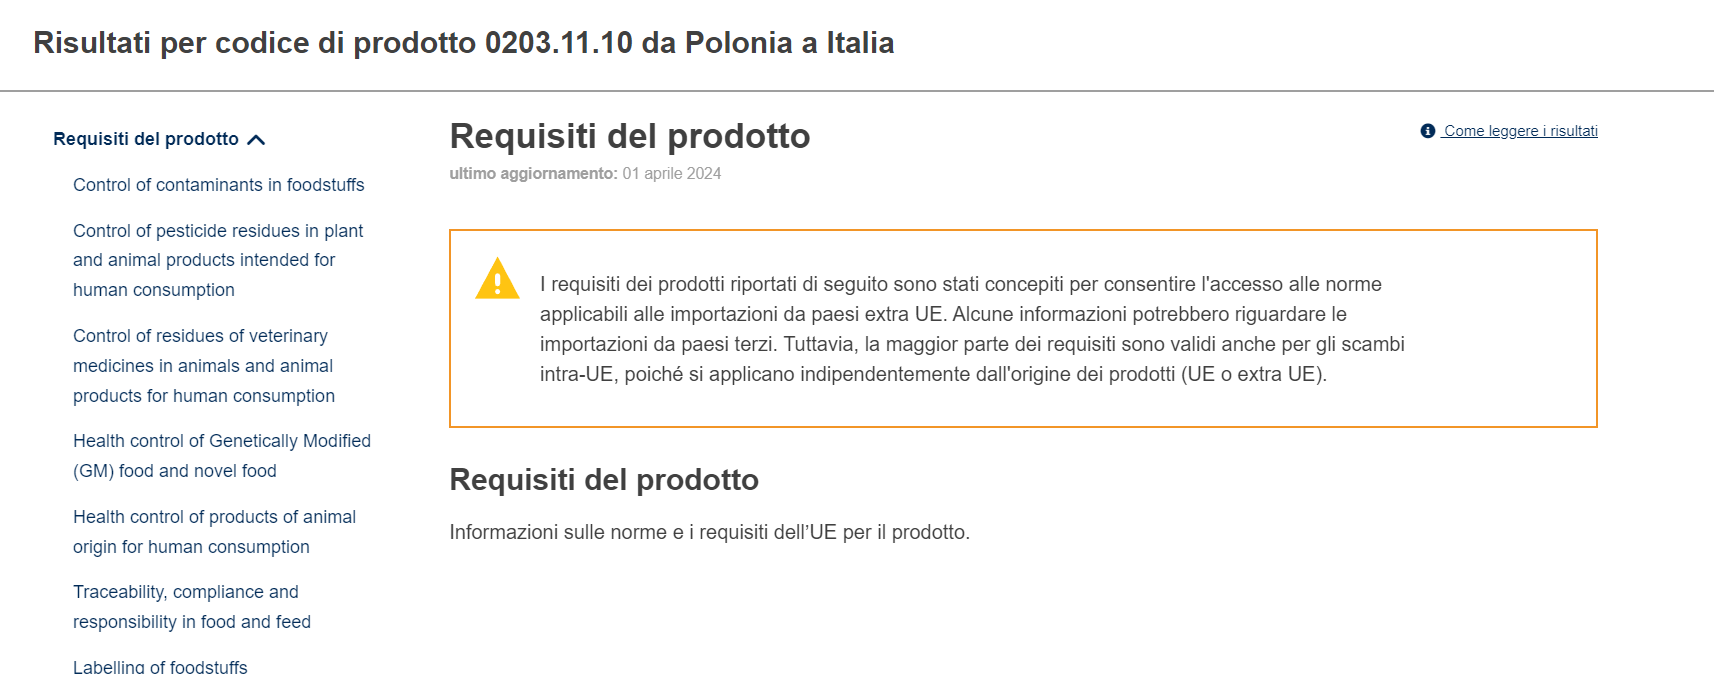

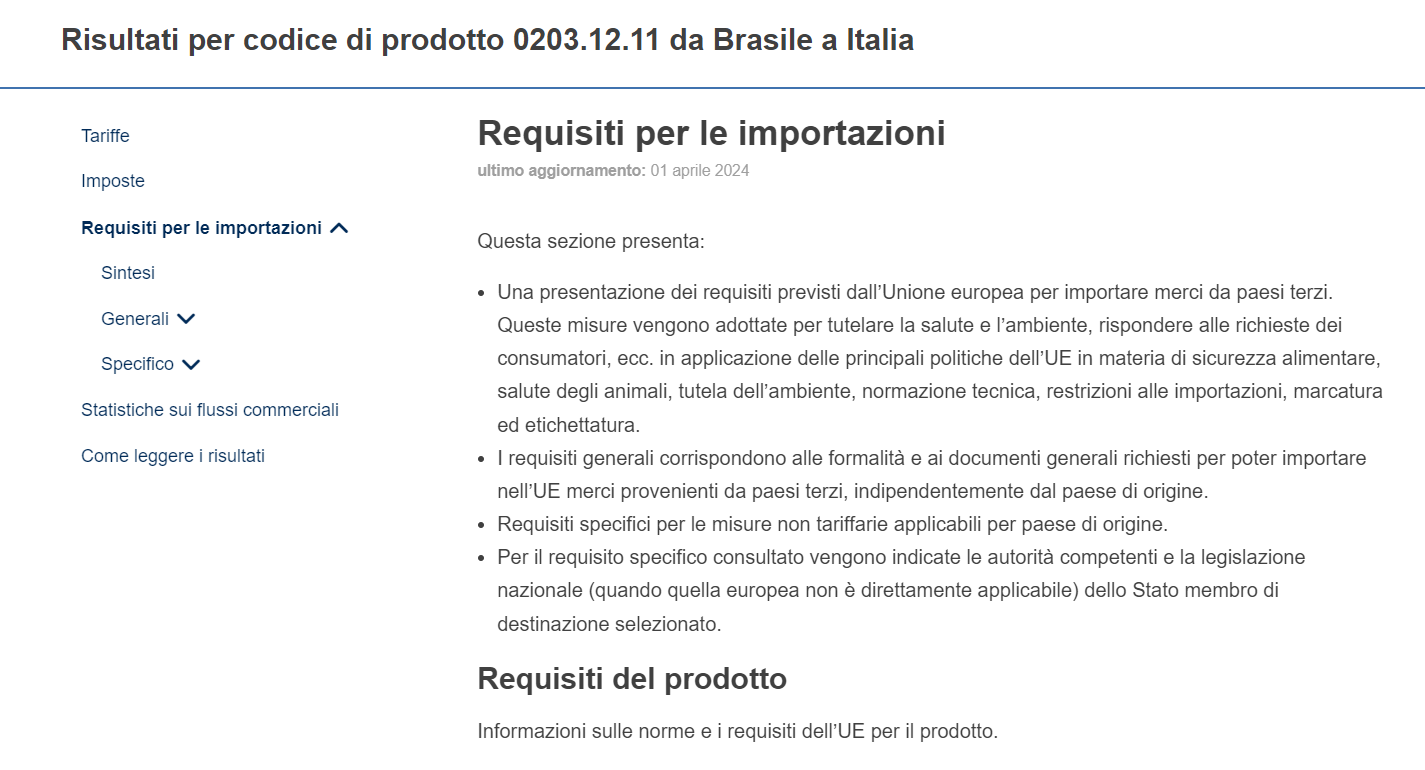

Ma dove si colloca il vero problema? 

#### Piccola parentesi per un enorme problema: gli allevamenti intensivi

In parte, l'importazione verso paesi esteri con coltivazioni sottopagate risutla vantaggiosa. 
In parte, <b> la stessa Europa si è dimostrata poco attenta alla realtà dell'industria agroalimentare </b>. Un esempio fondamentale, citato anche da Danilo, sono gli allevamenti intensivi.

Essi non solo rappresentano uno smacco economico per i piccoli produttori, ma anche un danno per ambiente, animali, lavoratori e salute. Secondo l’Agenzia europea per l’ambiente, il settore zootecnico da solo è responsabile del 54% di tutte le emissioni di metano di origine antropica. Questa stessa Europa, però, che continua a finanziarli.

Come leggiamo su "Nature", in un articolo di Jortleve et al.:

Eighty-two percent of EU farm subsidies articulated through the Common Agricultural Policy (CAP) financed high-emission livestock production in 2013, according to a study published in Nature Food. The analysis, which is based on data from 1986 to 2013 - the latest year for which records are available - highlights that 82% went to animal products in the following proportions: 38% directly and 44% for feed production. The authors note that food of animal origin is associated with 84 % of the greenhouse gases emitted by EU food production. 

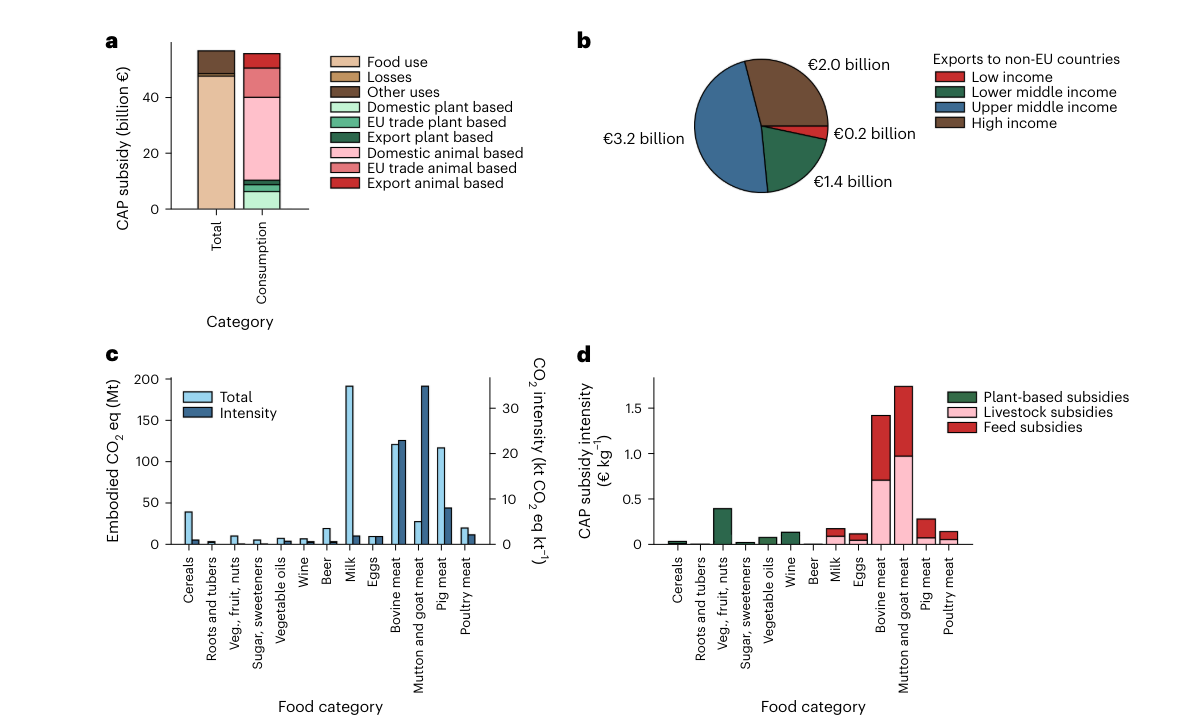

Gli allevamenti intensivi sono il 90% della produzione di carni e derivati animali, rappresentando un enorme rischio per l'ambiente - nonché una fonte di sofferenza per gli animali e di precaria qualità dei piatti.
La PAC, infatti, dà moltissimi soldi agli allevamenti intensivi. C'è infatti una lobby di allevamenti estremamente ingente. I tentativi di levare il finanziamento pubblico agli allevamenti europei sono sempre stati proposti da un'esigua minoranza di europarlamentari. 

Ma è forse un problema strettamente Europeo?

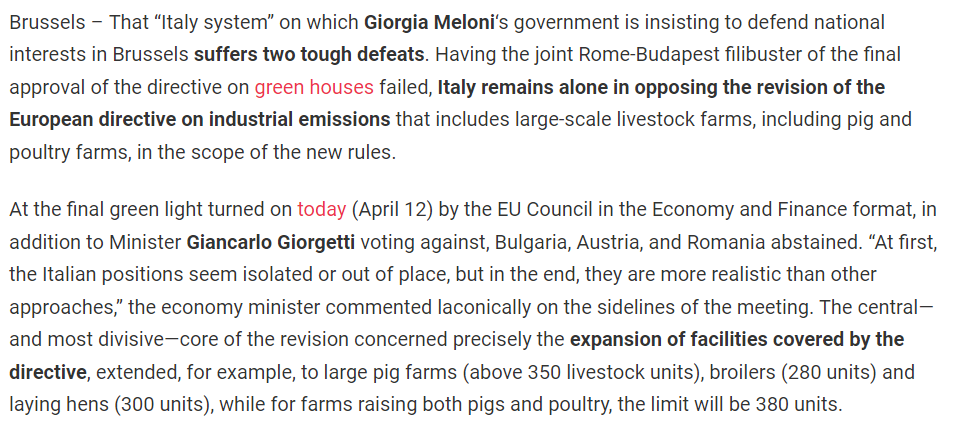

Si parla della Direttiva sulle Emissioni Industriali (IED), discussa a marzo a Bruxelles. Sono infatti state votate misure più restrittive su maiali e polli, lasciando però fuori i bovini. 
L'Italia, lamentando un rischio di abbassamento produttivo e un ulteriore carico burocratico da gestire, si è chiamata fuori.

«Con il voto sulla direttiva emissioni industriali - ha detto Ettore Prandini, presidente di Coldiretti - l’Unione europea ha perso l’ennesima occasione di invertire la rotta, abbandonando le follie di un estremismo green che rischia di far chiudere migliaia di allevamenti, stretti tra una burocrazia sempre più asfissiante e la concorrenza sleale dall’estero».

«La misura - spiega Cristina Tinelli, direttrice delle relazioni Ue e internazionali di Confagricoltura - nasceva con l’intento di prevenire e ridurre le emissioni del settore industriale e di quello agricolo, il risultato è un ulteriore carico burocratico per le nostre imprese le quali, invece, chiedono da tempo uno snellimento degli impegni amministrativi che frenano la produttività»

L'Italia, evidentemente, non dimostra una opposizione in termini ambientalisti da parte degli agricoltori uniti nelle proteste - o almeno, non in termini radicali. 
Ad opportsi strenuamente ad un cambio di status quo riguardo allevamenti intensivi sono soprattutto figure delle grandi aziende agricole Italiane, nonché rappresentanti del governo per quanto riguarda i sindacati e la gestione del settore agroalimentare. 

Dove sono, allora, le problematiche di natura salutare? Proprio qui, nel nostro paese: la tradizione enograstronomica italiana non ha nulla a che vedere con l'immagine sponsor di piccole realtà agricole e di pascolo. 
Nel nostro Paese l’85% dei polli sono allevati intensivamente, oltre il 95% dei maiali vivono in allevamenti intensivi e quasi tutte le mucche allevate per il latte non hanno mai visto un pascolo nella loro vita.

#### Un nuovo mercato? I cibi sintetici e le perplessità degli agricoltori

Riprendiamo ora uno dei punti delle rivendicazioni, e leggiamo: 

7- CIBI SINTETICI. Regolamenti stringenti che contrastino l’ingresso sul mercato di cibi sintetici.

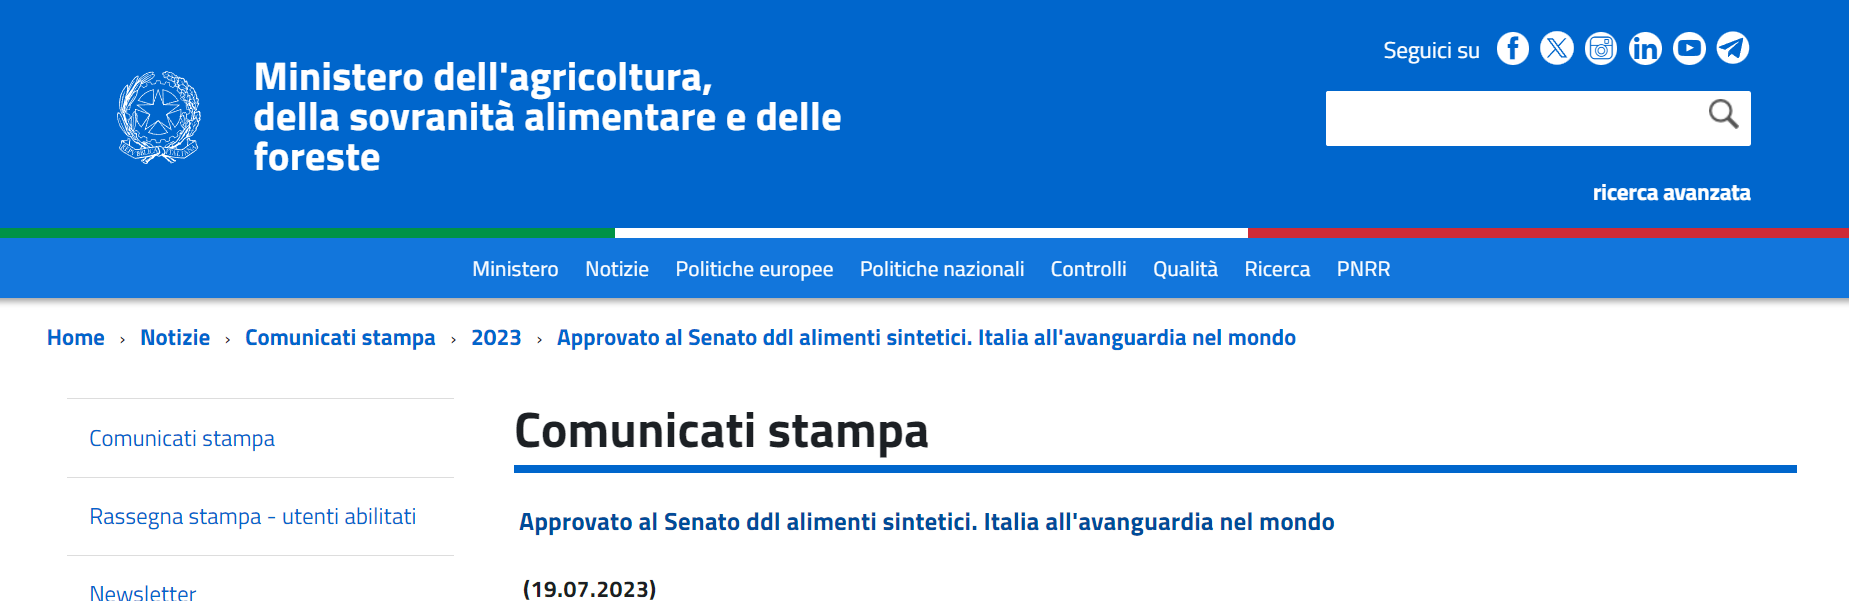

Il DDL a cui si fa riferimento è una mozione, proposta dal ministro Lollobrigida, per femrare la produzione del cibo sintetico. Proposto il 29 marzo, è stato poi approvato a luglio. 

Il testo vieta agli operatori del settore agroalimentare e della mangimistica di impiegare nella preparazione degli alimenti, bevande e mangimi alimenti o mangimi costituiti, isolati o prodotti a partire da colture cellulari o da tessuti derivanti da animali vertebrati, così come di venderli, importarli, produrli per esportarli e somministrarli. Le multe per i trasgressori sono estremamente alte.
La motivazione sarebbe legata a motivi di slaute - appena discussi escaturiti da tutt'altre preoccupazioni,. Si legge poi un "rischio per la biodiversità" causato dallo scarso investimento in allevamenti. Un'affermazione poco chiara, da parte di Lollobrigida, visto che gli allevamenti sono uno dei principali fattori di inquinamento e perdita di biodiversità.

Ma al di là del caso italiano, vanno chiarite alcun cose. 


##### Ma cosa sono questi cibi sintetici?
C'è moltissima confusione a riguardo, che porta alla sovrapposizione di tre cose ben distinte:

1. Carni ottenute da cellule di animali, lavorate in laboratorio
2. Cibi che emulano altri prodotti (soparttutto di origine animale) ma ottenuti secondo altre processazioni, sempre laboratoriali.
3. Prodotti a base di insetti. 

Vediamoli. 

1. La carne ottenuta da cellule animali è ancora un prodotto estremamente costoso - anche se progressivamente in calo - e su cui la ricerca (specialmente in America e Israele) sta investendo moltissimo. Ad oggi, l'unico paese dove è in vendita è Singapore. 
Resta dunque un mercato estremamente chiuso dove si stanno ancora portando avanti studi e ricerche sul loro impatto sulla salute. 

2. I cibi ottenuti da legumi, glutine e altri prodotti vegetali - volti a imitare carne e prodotti di origine animale - sono invece tutt'altra cosa. In Italia sono largamente diffusi e consumati. Sono cibi altamente processati, dunque l'essere 100% vegetali non ne costituisce una garanzia di qualità. Ma al di là dell'aspetto nutrizionale, il loro impatto ambientale è ridotto fino al 90%. Infatti, consumano molta meno acqua e non contribuiscono alla deforestazione (paradossalmente, l'80% della soia prodotta va agli animali per gli allevamenti intensivi).

3. A questo punto, veniamo a tutt'altra tipologia di prodotto: gli insetti. Estremamente dibattuta come questione, la proposta di consumare insetti nasce dal ridotto impatto ambientale al netto di proprietà nutrizionali estremamente performanti. 
A fine dicembere 2023, lo stesso Lollobrigida ha permesso il commercio di prodotti che cotnengono la larva gialla, la locusta migratoria, il grillo domestico e il verme della farina minore. 
La FAO stima che per il 2050 dovremo fronteggiare un aumento della popolazione del 70%, obiettivo incompatibile con l'impatto dell'agricoltura, il cambiamento climatico e la minaccia per la biodiversità. Il consumo di insetti - già ampiamente praticato in diversi paesi - potrebbe quindi essere un'alternativa più sostenibile per l'introito di nutrienti adeguati. 
Ovviamente, l'aspetto legato ad una certa diffidenza davanti ad un prodotto così diverso dalla nostra tradizione lascia perplessi molti consumatori. Ma questa è e sarà una questione di marketing, informazione e pubblicità. Per il momento, non rappresentano una minaccia per gli agricoltori né un motivo di preoccupazione per la salute. 

FONTI: FAO


